In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import DotsGeneticAlgorithmState
from src.nsga import NSGeneticAlgorithm
from src.crossovers import mean_crossover
from src.mutations import square_mutation

In [2]:
POPULATION_SIZE = 300
DIMENSION_SIZE = 3
CONSTRAINTS = (-4, 4)
RANDOM_STATE = 100

In [3]:
current_state = DotsGeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

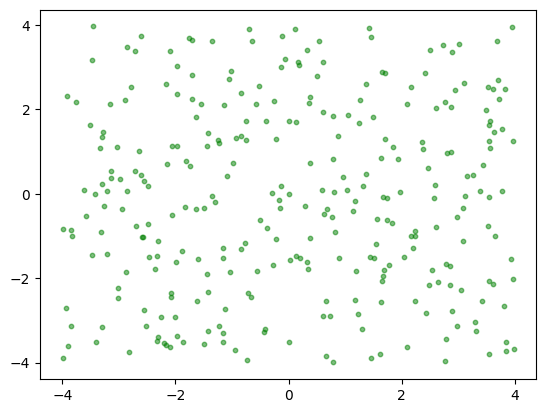

In [4]:
x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [5]:
from typing import Sequence


def function_1(pop: Sequence[float]):
    first = np.power(pop - 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

def function_2(pop: Sequence[float]):
    first = np.power(pop + 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

function_1([3, 4])
function_2([3, 4])

0.9999999999999998

In [6]:
algo = NSGeneticAlgorithm(
    state=current_state,
    eval_functions=[function_1, function_2],
    mutation_function=square_mutation,
    mating_function=mean_crossover,
)

In [7]:
algo.get_best()

[[0.5958067361867077, 0.10293014475030127, 0.435814464575472],
 [0.005672946670356893, 0.007116033229406682, 0.871224830533925],
 [-0.29979018158483406, 0.020948513301724425, -0.10206765006247842],
 [-0.16605614502530397, -0.14266383610231603, 0.21236332834888128],
 [-0.3901042868708844, -0.8147553611786753, -0.3400983102484112]]

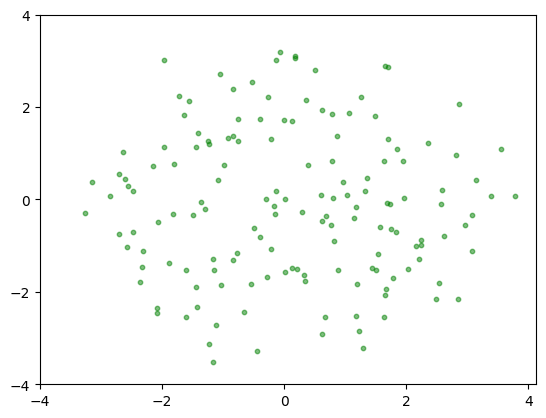

In [8]:
algo.select(keep_share=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

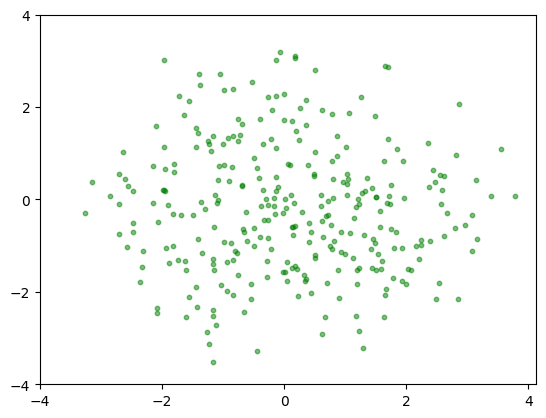

In [9]:
algo.mate()

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

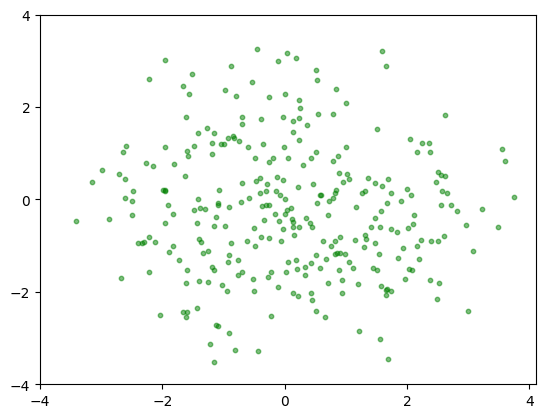

In [10]:
algo.mutate(delta=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [11]:
algo.get_best()

[[0.5958067361867077, 0.10293014475030127, 0.435814464575472],
 [-0.30063304303687066, -0.12922057194896408, -0.38541074132472775],
 [0.23329618698171406, -0.6044286246471474, -0.2205549548620641],
 [-0.3901042868708844, -0.8147553611786753, -0.3400983102484112],
 [0.5200805010984849, -0.07322870950237348, 0.41714010550055136],
 [-0.03283433500789279, 0.4239546070048923, -0.11183912714049626]]

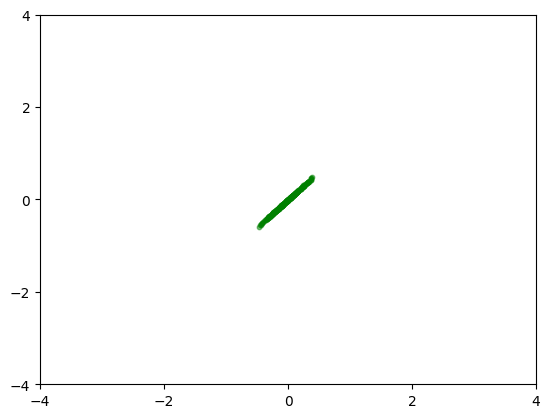

In [12]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [13]:
algo.get_best()

[[-0.4682879823983443, -0.5861043360835131, -0.5721213108781813],
 [0.3826292117473294, 0.47991583380062586, 0.45056302932307263],
 [-0.2610656033761454, -0.3260344184115546, -0.3163092501392156],
 [-0.2996366364130775, -0.3830071173734712, -0.3757732178442755],
 [-0.2817822636531085, -0.35015533500518686, -0.35150907131621245],
 [-0.14711699753403087, -0.17846165781635642, -0.18486455958213305],
 [-0.3766962054977014, -0.45228636597177585, -0.46849124371249595],
 [-0.19592479688136394, -0.24194207834534553, -0.24567862434810428],
 [-0.32504511313421364, -0.3995427722192635, -0.41675878937348343],
 [-0.4012557718817188, -0.47971890090491914, -0.4886241798314947],
 [-0.20658643880249322, -0.2609321670382135, -0.2605499192366704],
 [-0.0929633582317448, -0.12290518478953402, -0.1236851701163552],
 [-0.3559463803475722, -0.439774358135274, -0.4342501330051346],
 [-0.13630677829306587, -0.1728881792528724, -0.17108574607817245],
 [-0.29538132614574575, -0.3677782023965245, -0.3556701945443